In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
digits = load_digits()
x, y = digits.data, digits.target

In [3]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

image for random sample: 1468 - target: 8


<Figure size 432x288 with 0 Axes>

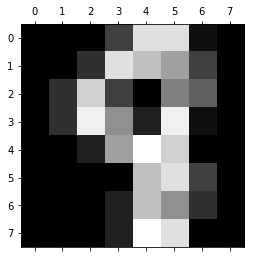

In [4]:
# show a digit from x
from random import randint
random_sample = randint(0, len(x))
print(f"image for random sample: {random_sample} - target: {digits.target[random_sample]}")

plt.gray()
plt.matshow(digits.images[random_sample])
plt.show()

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
# split test/training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
# Scale data - standardise (make mean=0 & sd=1 for each col)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [8]:
# Train the model
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [9]:
#Evaluate
x_test = scaler.transform(x_test)
print(f"score on training data: {model.score(x_train, y_train)}")
print(f"score on test data:     {model.score(x_test, y_test)}")

score on training data: 0.964509394572025
score on test data:     0.9416666666666667


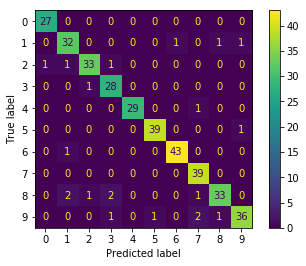

In [10]:
plot_confusion_matrix(model, x_test, y_test)